In [1]:
import tracemalloc

from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
import json
import pickle 
import src.trainer.evidential as evidential


In [3]:
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''


#dates = [2018, 2019]

site = 'PA'
if site == 'PA':
	dates = [2017, 2018]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)
	#exp_id_base = 148
	# exp_id_base = 155
	exp_id_base = 194
	exp_id_base = 198
	exp_id_base = 214

	# earlier date
	exp_id_base = 224
		
else:
	dates = [2018, 2019]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	
	# MT
	# exp_id_base = 196
	# early date
	exp_id_base = 206
	# early date inference
	exp_id_base = 210

ic(dates)

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [4]:
repetition_n = 10
# repetition_n = 6

experiment_values = np.ones(repetition_n).astype(np.uint8)


# experiment_values = [int(x) for x in experiment_values]
results = []




exp_ids = range(exp_id_base, exp_id_base+len(experiment_values))

training = False
inferring = True

In [5]:
exp_ids

range(210, 220)

In [6]:
from enum import Enum
UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')
uncertaintyMethod = "evidential"


In [7]:
if training == True:
    idx = 0
    while idx < len(exp_ids):
    # for experiment_value, exp_id in zip(experiment_values, exp_ids):
        try:
            config = {
            "training": True,
            "learning_rate": 1e-4,
            "weights": [0.1, 0.9, 0],
            "save_probabilities": False,
            "loadInference": False,
            "addPastDeforestationInput": True,
            "inference_times": 1,
            "Uncertainty": {
                "annealing_step": 10*375 # 1875
            },
            "uncertainty_method": uncertaintyMethod,
            "evidence_function": evidential.relu_evidence
            }
            print("Beginning run number {}".format(idx))
            trainer = TrainerEvidential(config, dataset, patchesHandler)

            trainer.defineExperiment(exp_ids[idx])

            trainer.setExperimentPath()
            trainer.createLogFolders()

            trainer.loadDataset()

            # %%
            if config["training"] == True:
                trainer.run()
            idx += 1
            print("Grid execution idx: {}".format(idx))            
        except Exception as e: 
            print(e)
            print("Execution error in idx {}. Retrying...".format(idx))
            continue


In [8]:

if site == 'PA':

	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	

else:

	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	


ic(dates)

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2019, 2020]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


Beginning run number 0
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp210/models/resunet_0.h5'


time:  0
(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))
(16795, 10420)
(array([0.], dtype=float32), array([175003900], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)
ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)
ic| np.unique(predicted, return_counts=True): (array([0.], dtype=float32), array([175003900], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0.], dtype=float32), array([175003900], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0.], dtype=float32), array([175003900], dtype=int64))
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
ic| self.f1: 0.0, self.precision: 0.0, self.recall: 0.0
ic| self.label_mask_val.shape: (21000468,)
ic| self.label_mask_val_valid.shape: (11806421,)
c:\Users\jchamorro\Anaconda3\

(array([0., 1.], dtype=float32), array([172732404,   2271496], dtype=int64))
[0.]


ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44657480,)
ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


(44657480,) (44657480,)
0.0


ic| bounds: (0.0015, 0.9985)


0.727260500134763
0.38232011321635484
threshold 0.38232011321635484


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


index 1 is out of bounds for axis 0 with size 1
Execution error in idx 0. Retrying...
Beginning run number 1
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp211/models/resunet_0.h5'


time:  0
(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))
(16795, 10420)
(array([0., 1.], dtype=float32), array([173915843,   1088057], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)
ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([173915843,   1088057], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([174101783,    902117], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([174817960,    185940], dtype=int64))
ic| self.f1: 54.94, self.precision: 93.3, self.recall: 38.93
ic| self.label_mask_val.shape: (21000468,)
ic| self.label_mask_val_valid.shape: (11780160,)
ic| f1_val: 81.47
    precision_val: 97.52
    recall_val: 69.95
    mAP_val: 87.49


(array([0., 1.], dtype=float32), array([173534435,   1469465], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44594016,)
ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


(44594016,) (44594016,)
0.020250465142625233


ic| bounds: (0.0015, 0.9985)


0.3783536949579121
0.38232011321635484
threshold 0.38232011321635484


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (28350857,)
    predicted_test_classified_incorrect.shape: (28350857,)
ic| TP_H + FN_H + FP_H + TN_H: 28350857
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 28350857
    len(label_mask_current_deforestation_test): 44594016


[0.95231914 0.90556032 0.27590786 0.63575474 0.8890102  0.16311976
 0.01808916]
0.6176798867836452
threshold 0.6176798867836452


ic| label_current_deforestation_test_classified_incorrect.shape: (25277291,)
    predicted_test_classified_incorrect.shape: (25277291,)
ic| TP_H + FN_H + FP_H + TN_H: 25277291
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 25277291
    len(label_mask_current_deforestation_test): 44594016


[0.93559832 0.85017731 0.33700675 0.56683146 0.91634479 0.08668136
 0.01889852]
0.7631402264327096
threshold 0.7631402264327096


ic| label_current_deforestation_test_classified_incorrect.shape: (23739895,)
    predicted_test_classified_incorrect.shape: (23739895,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 23739895
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 23739895
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.81641754 0.38932798 0.53235607        nan 0.
 0.01890466]
0.8530396603509355
threshold 0.8530396603509355


ic| label_current_deforestation_test_classified_incorrect.shape: (22331917,)
    predicted_test_classified_incorrect.shape: (22331917,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 22331917
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 22331917
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.72031148 0.38932798 0.50078282        nan 0.
 0.01760462]
0.9086005660817742
threshold 0.9086005660817742


ic| label_current_deforestation_test_classified_incorrect.shape: (20950739,)
    predicted_test_classified_incorrect.shape: (20950739,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 20950739
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 20950739
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.662516   0.38932798 0.46981055        nan 0.
 0.01679968]
0.9429390942691613
threshold 0.9429390942691613


ic| label_current_deforestation_test_classified_incorrect.shape: (19946040,)
    predicted_test_classified_incorrect.shape: (19946040,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 19946040
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 19946040
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.62877132 0.38932798 0.44728064        nan 0.
 0.01626677]
0.9641614718126129
threshold 0.9641614718126129


ic| label_current_deforestation_test_classified_incorrect.shape: (19297729,)
    predicted_test_classified_incorrect.shape: (19297729,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 19297729
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 19297729
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.61110048 0.38932798 0.43274257        nan 0.
 0.01600417]
0.9772776224565485
threshold 0.9772776224565485


ic| label_current_deforestation_test_classified_incorrect.shape: (18890720,)
    predicted_test_classified_incorrect.shape: (18890720,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18890720
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18890720
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.6013407  0.38932798 0.42361558        nan 0.
 0.01587162]
0.9853838493560645
threshold 0.9853838493560645


ic| label_current_deforestation_test_classified_incorrect.shape: (18636007,)
    predicted_test_classified_incorrect.shape: (18636007,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18636007
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18636007
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.59557361 0.38932798 0.41790376        nan 0.
 0.01579517]
0.990393773100484
threshold 0.990393773100484


ic| label_current_deforestation_test_classified_incorrect.shape: (18477903,)
    predicted_test_classified_incorrect.shape: (18477903,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18477903
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18477903
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.59215841 0.38932798 0.41435835        nan 0.
 0.01575235]
0.9934900762555805
threshold 0.9934900762555805


ic| label_current_deforestation_test_classified_incorrect.shape: (18379951,)
    predicted_test_classified_incorrect.shape: (18379951,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18379951
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18379951
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.59009771 0.38932798 0.41216182        nan 0.
 0.01572734]
0.9954036968449036
threshold 0.9954036968449036


ic| label_current_deforestation_test_classified_incorrect.shape: (18319227,)
    predicted_test_classified_incorrect.shape: (18319227,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18319227
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18319227
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.58882867 0.38932798 0.41080012        nan 0.
 0.01571177]
0.996586379410677
threshold 0.996586379410677


ic| label_current_deforestation_test_classified_incorrect.shape: (18281869,)
    predicted_test_classified_incorrect.shape: (18281869,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18281869
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18281869
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.58808224 0.38932798 0.40996238        nan 0.
 0.01570382]
0.9973173174342268
threshold 0.9973173174342268


ic| label_current_deforestation_test_classified_incorrect.shape: (18258448,)
    predicted_test_classified_incorrect.shape: (18258448,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18258448
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18258448
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.58762581 0.38932798 0.40943718        nan 0.
 0.01569938]
0.9977690619764502
threshold 0.9977690619764502


ic| label_current_deforestation_test_classified_incorrect.shape: (18244058,)
    predicted_test_classified_incorrect.shape: (18244058,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18244058
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18244058
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.58732844 0.38932798 0.40911449        nan 0.
 0.01569573]
0.9980482554577765
threshold 0.9980482554577765


ic| label_current_deforestation_test_classified_incorrect.shape: (18235165,)
    predicted_test_classified_incorrect.shape: (18235165,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18235165
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18235165
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.58713412 0.38932798 0.40891507        nan 0.
 0.0156929 ]
0.9982208065186736
threshold 0.9982208065186736


ic| label_current_deforestation_test_classified_incorrect.shape: (18229668,)
    predicted_test_classified_incorrect.shape: (18229668,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18229668
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18229668
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.58702109 0.38932798 0.4087918         nan 0.
 0.01569152]
0.9983274489391029
threshold 0.9983274489391029


ic| label_current_deforestation_test_classified_incorrect.shape: (18226245,)
    predicted_test_classified_incorrect.shape: (18226245,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18226245
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18226245
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.58694713 0.38932798 0.40871504        nan 0.
 0.01569047]
0.9983933575795707
threshold 0.9983933575795707


ic| label_current_deforestation_test_classified_incorrect.shape: (18224112,)
    predicted_test_classified_incorrect.shape: (18224112,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18224112
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18224112
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.58689372 0.38932798 0.40866721        nan 0.
 0.01568942]
0.9984340913595322
threshold 0.9984340913595322


ic| label_current_deforestation_test_classified_incorrect.shape: (18222790,)
    predicted_test_classified_incorrect.shape: (18222790,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18222790
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18222790
    len(label_mask_current_deforestation_test): 44594016
ic| self.threshold_optimal: 0.9984340913595322


[0.93296394 0.5868701  0.38932798 0.40863756        nan 0.
 0.01568928]
threshold 0.9984340913595322


ic| label_current_deforestation_test_classified_incorrect.shape: (18222790,)
    predicted_test_classified_incorrect.shape: (18222790,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 18222790
    len(label_mask_current_deforestation_test): 44594016
ic| TP_H + FN_H + FP_H + TN_H: 18222790
    len(label_mask_current_deforestation_test): 44594016


[0.93296394 0.5868701  0.38932798 0.40863756        nan 0.
 0.01568928]
threshold 0.9984340913595322
(44594016,) (44594016,)


ic| self.m_optimal: {'AA': array([0.40863756]),
                     'UEO': array([0.01568928]),
                     'f1': 54.94,
                     'f1_H': array([nan]),
                     'f1_L': array([0.72051109]),
                     'precision_H': array([nan]),
                     'precision_L': array([0.93296394]),
                     'recall_H': array([0.]),
                     'recall_L': array([0.5868701]),
                     'recall_Ltotal': array([0.38932798])}
ic| self.m_audited_optimal: {'f1': array([0.82778799]),
                             'precision': array([0.96289413]),
                             'recall': array([0.72593078])}


cm_audited [[43708411    24100]
 [  236112   625393]]
[0.96289413 0.72593078]
Result idx 1: {'other_uncertainty_metrics': {'sUEO': 0.020250465142625233, 'ece_score': 0.3783536949579121}, 'uncertainty_result': {'metrics': {'precision_L': array([0.93296394]), 'recall_L': array([0.5868701]), 'recall_Ltotal': array([0.38932798]), 'AA': array([0.40863756]), 'precision_H': array([nan]), 'recall_H': array([0.]), 'UEO': array([0.01568928]), 'f1_L': array([0.72051109]), 'f1_H': array([nan]), 'f1': 54.94}, 'metrics_audited': {'precision': array([0.96289413]), 'recall': array([0.72593078]), 'f1': array([0.82778799])}, 'exp': 211}}
Grid execution idx: 1
Beginning run number 2
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp212/models/resunet_0.h5'


time:  0
(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))
(16795, 10420)
(array([0., 1.], dtype=float32), array([172807480,   2196420], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)
ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([172807480,   2196420], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([173132183,   1871717], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([174679197,    324703], dtype=int64))
ic| self.f1: 68.56, self.precision: 77.79, self.recall: 61.29
ic| self.label_mask_val.shape: (21000468,)
ic| self.label_mask_val_valid.shape: (11767776,)
ic| f1_val: 93.02
    precision_val: 90.42
    recall_val: 95.78
    mAP_val: 97.94


(array([0., 1.], dtype=float32), array([173818493,   1185407], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44532168,)
ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


(44532168,) (44532168,)
0.14865209095167847


ic| bounds: (0.0015, 0.9985)


0.2298546076324019
0.38232011321635484
threshold 0.38232011321635484


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (9594426,)
    predicted_test_classified_incorrect.shape: (9594426,)
ic| TP_H + FN_H + FP_H + TN_H: 9594426
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 9594426
    len(label_mask_current_deforestation_test): 44532168


[0.83884318 0.98336035 0.50877338 0.21544934 0.57398244 0.21572619
 0.0399548 ]
0.6176798867836452
threshold 0.6176798867836452


ic| label_current_deforestation_test_classified_incorrect.shape: (5161324,)
    predicted_test_classified_incorrect.shape: (5161324,)
ic| TP_H + FN_H + FP_H + TN_H: 5161324
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 5161324
    len(label_mask_current_deforestation_test): 44532168


[0.79549891 0.97419964 0.57742444 0.11590103 0.57159402 0.08707006
 0.06381432]
0.7631402264327096
threshold 0.7631402264327096


ic| label_current_deforestation_test_classified_incorrect.shape: (3130751,)
    predicted_test_classified_incorrect.shape: (3130751,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 3130751
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 3130751
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.95150094 0.61288662 0.07030313        nan 0.
 0.09139311]
0.8530396603509355
threshold 0.8530396603509355


ic| label_current_deforestation_test_classified_incorrect.shape: (2234912,)
    predicted_test_classified_incorrect.shape: (2234912,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 2234912
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 2234912
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.8728181  0.61288662 0.05018646        nan 0.
 0.10280683]
0.9086005660817742
threshold 0.9086005660817742


ic| label_current_deforestation_test_classified_incorrect.shape: (1674136,)
    predicted_test_classified_incorrect.shape: (1674136,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1674136
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1674136
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.81537244 0.61288662 0.03759386        nan 0.
 0.10864674]
0.9429390942691613
threshold 0.9429390942691613


ic| label_current_deforestation_test_classified_incorrect.shape: (1317986,)
    predicted_test_classified_incorrect.shape: (1317986,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1317986
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1317986
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.77790087 0.61288662 0.02959627        nan 0.
 0.11150392]
0.9641614718126129
threshold 0.9641614718126129


ic| label_current_deforestation_test_classified_incorrect.shape: (1103471,)
    predicted_test_classified_incorrect.shape: (1103471,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1103471
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1103471
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.75388764 0.61288662 0.02477919        nan 0.
 0.11167099]
0.9391000915458941
threshold 0.9391000915458941


ic| label_current_deforestation_test_classified_incorrect.shape: (1357549,)
    predicted_test_classified_incorrect.shape: (1357549,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1357549
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1357549
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.7822654  0.61288662 0.03048468        nan 0.
 0.11134444]
0.9420847369132916
threshold 0.9420847369132916


ic| label_current_deforestation_test_classified_incorrect.shape: (1326706,)
    predicted_test_classified_incorrect.shape: (1326706,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1326706
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1326706
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.77886616 0.61288662 0.02979208        nan 0.
 0.11147258]
0.9411453230307975
threshold 0.9411453230307975


ic| label_current_deforestation_test_classified_incorrect.shape: (1336402,)
    predicted_test_classified_incorrect.shape: (1336402,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1336402
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1336402
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.77997296 0.61288662 0.03000981        nan 0.
 0.11145593]
0.9403641141184258
threshold 0.9403641141184258


ic| label_current_deforestation_test_classified_incorrect.shape: (1344308,)
    predicted_test_classified_incorrect.shape: (1344308,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1344308
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1344308
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.78080981 0.61288662 0.03018735        nan 0.
 0.11140317]
0.9412009498399759
threshold 0.9412009498399759


ic| label_current_deforestation_test_classified_incorrect.shape: (1335854,)
    predicted_test_classified_incorrect.shape: (1335854,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1335854
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1335854
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.77990398 0.61288662 0.02999751        nan 0.
 0.11145317]
0.9415385264631647
threshold 0.9415385264631647


ic| label_current_deforestation_test_classified_incorrect.shape: (1332388,)
    predicted_test_classified_incorrect.shape: (1332388,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1332388
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1332388
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.77950324 0.61288662 0.02991968        nan 0.
 0.11145629]
0.9412445660401306
threshold 0.9412445660401306


ic| label_current_deforestation_test_classified_incorrect.shape: (1335385,)
    predicted_test_classified_incorrect.shape: (1335385,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1335385
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1335385
    len(label_mask_current_deforestation_test): 44532168
ic| self.threshold_optimal: 0.9412009498399759


[0.7778683  0.77985489 0.61288662 0.02998697        nan 0.
 0.1114566 ]
threshold 0.9412009498399759


ic| label_current_deforestation_test_classified_incorrect.shape: (1335854,)
    predicted_test_classified_incorrect.shape: (1335854,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1335854
    len(label_mask_current_deforestation_test): 44532168
ic| TP_H + FN_H + FP_H + TN_H: 1335854
    len(label_mask_current_deforestation_test): 44532168


[0.7778683  0.77990398 0.61288662 0.02999751        nan 0.
 0.11145317]
threshold 0.9412009498399759
(44532168,) (44532168,)


ic| self.m_optimal: {'AA': array([0.02999751]),
                     'UEO': array([0.11145317]),
                     'f1': 68.56,
                     'f1_H': array([nan]),
                     'f1_L': array([0.77888481]),
                     'precision_H': array([nan]),
                     'precision_L': array([0.7778683]),
                     'recall_H': array([0.]),
                     'recall_L': array([0.77990398]),
                     'recall_Ltotal': array([0.61288662])}
ic| self.m_audited_optimal: {'f1': array([0.82618825]),
                             'precision': array([0.82534044]),
                             'recall': array([0.82703781])}


cm_audited [[43534590   148589]
 [  146843   702146]]
[0.82534044 0.82703781]
Result idx 2: {'other_uncertainty_metrics': {'sUEO': 0.14865209095167847, 'ece_score': 0.2298546076324019}, 'uncertainty_result': {'metrics': {'precision_L': array([0.7778683]), 'recall_L': array([0.77990398]), 'recall_Ltotal': array([0.61288662]), 'AA': array([0.02999751]), 'precision_H': array([nan]), 'recall_H': array([0.]), 'UEO': array([0.11145317]), 'f1_L': array([0.77888481]), 'f1_H': array([nan]), 'f1': 68.56}, 'metrics_audited': {'precision': array([0.82534044]), 'recall': array([0.82703781]), 'f1': array([0.82618825])}, 'exp': 212}}
Grid execution idx: 2
Beginning run number 3
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp213/models/resunet_0.h5'


time:  0
(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))
(16795, 10420)
(array([0., 1.], dtype=float32), array([172701071,   2302829], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)
ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([172701071,   2302829], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([173063092,   1940808], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([174641879,    362021], dtype=int64))
ic| self.f1: 77.55, self.precision: 85.49, self.recall: 70.95
ic| self.label_mask_val.shape: (21000468,)
ic| self.label_mask_val_valid.shape: (11766155,)
ic| f1_val: 91.21
    precision_val: 87.71
    recall_val: 95.01
    mAP_val: 96.98


(array([0., 1.], dtype=float32), array([174012088,    991812], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44519672,)
ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


(44519672,) (44519672,)
0.510461942424998


ic| bounds: (0.0015, 0.9985)


0.09186249262714595
0.38232011321635484
threshold 0.38232011321635484


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1387446,)
    predicted_test_classified_incorrect.shape: (1387446,)
ic| TP_H + FN_H + FP_H + TN_H: 1387446
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1387446
    len(label_mask_current_deforestation_test): 44519672


[0.91751487 0.80832653 0.58663036 0.03116478 0.64488388 0.44812205
 0.12030064]
0.6176798867836452
threshold 0.6176798867836452


ic| label_current_deforestation_test_classified_incorrect.shape: (441123,)
    predicted_test_classified_incorrect.shape: (441123,)
ic| TP_H + FN_H + FP_H + TN_H: 441123
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 441123
    len(label_mask_current_deforestation_test): 44519672


[0.87007034 0.80674684 0.67104588 0.0099085  0.65571246 0.22881811
 0.19249705]
0.23685977356729035
threshold 0.23685977356729035


ic| label_current_deforestation_test_classified_incorrect.shape: (2951991,)
    predicted_test_classified_incorrect.shape: (2951991,)
ic| TP_H + FN_H + FP_H + TN_H: 2951991
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 2951991
    len(label_mask_current_deforestation_test): 44519672


[0.95115667 0.7965806  0.47070447 0.06630756 0.71276305 0.58380352
 0.07382207]
0.4524490235478841
threshold 0.4524490235478841


ic| label_current_deforestation_test_classified_incorrect.shape: (906990,)
    predicted_test_classified_incorrect.shape: (906990,)
ic| TP_H + FN_H + FP_H + TN_H: 906990
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 906990
    len(label_mask_current_deforestation_test): 44519672


[0.90298806 0.80881038 0.61695613 0.02037279 0.63101373 0.39028905
 0.15565101]
0.3267592074855162
threshold 0.3267592074855162


ic| label_current_deforestation_test_classified_incorrect.shape: (1877618,)
    predicted_test_classified_incorrect.shape: (1877618,)
ic| TP_H + FN_H + FP_H + TN_H: 1877618
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1877618
    len(label_mask_current_deforestation_test): 44519672


[0.92958715 0.80670251 0.55527965 0.04217502 0.66314201 0.49493526
 0.09908223]
0.39359961942526905
threshold 0.39359961942526905


ic| label_current_deforestation_test_classified_incorrect.shape: (1298471,)
    predicted_test_classified_incorrect.shape: (1298471,)
ic| TP_H + FN_H + FP_H + TN_H: 1298471
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1298471
    len(label_mask_current_deforestation_test): 44519672


[0.91508222 0.80852213 0.59206153 0.02916623 0.64210952 0.43878544
 0.12544924]
0.39371601131778267
threshold 0.39371601131778267


ic| label_current_deforestation_test_classified_incorrect.shape: (1297540,)
    predicted_test_classified_incorrect.shape: (1297540,)
ic| TP_H + FN_H + FP_H + TN_H: 1297540
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1297540
    len(label_mask_current_deforestation_test): 44519672


[0.91506185 0.80852612 0.59212141 0.02914532 0.64206242 0.43867722
 0.12550904]
0.38875987723159877
threshold 0.38875987723159877


ic| label_current_deforestation_test_classified_incorrect.shape: (1336458,)
    predicted_test_classified_incorrect.shape: (1336458,)
ic| TP_H + FN_H + FP_H + TN_H: 1336458
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1336458
    len(label_mask_current_deforestation_test): 44519672


[0.91602943 0.80842561 0.58971577 0.03001949 0.64356973 0.4428918
 0.12313898]
0.3863001062573041
threshold 0.3863001062573041


ic| label_current_deforestation_test_classified_incorrect.shape: (1355747,)
    predicted_test_classified_incorrect.shape: (1355747,)
ic| TP_H + FN_H + FP_H + TN_H: 1355747
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1355747
    len(label_mask_current_deforestation_test): 44519672


[0.91659993 0.80840259 0.58855816 0.03045276 0.64403263 0.44485026
 0.12205453]
0.3893967002313405
threshold 0.3893967002313405


ic| label_current_deforestation_test_classified_incorrect.shape: (1331354,)
    predicted_test_classified_incorrect.shape: (1331354,)
ic| TP_H + FN_H + FP_H + TN_H: 1331354
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1331354
    len(label_mask_current_deforestation_test): 44519672


[0.91588921 0.80844444 0.59001046 0.02990485 0.64343951 0.44237078
 0.12344487]
0.38845462621462123
threshold 0.38845462621462123


ic| label_current_deforestation_test_classified_incorrect.shape: (1338791,)
    predicted_test_classified_incorrect.shape: (1338791,)
ic| TP_H + FN_H + FP_H + TN_H: 1338791
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1338791
    len(label_mask_current_deforestation_test): 44519672


[0.9160829  0.80843076 0.58956197 0.0300719  0.64368547 0.44314106
 0.12300695]
0.3888856342916046
threshold 0.3888856342916046


ic| label_current_deforestation_test_classified_incorrect.shape: (1335444,)
    predicted_test_classified_incorrect.shape: (1335444,)
ic| TP_H + FN_H + FP_H + TN_H: 1335444
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1335444
    len(label_mask_current_deforestation_test): 44519672


[0.91600414 0.80843284 0.589778   0.02999672 0.64353175 0.44277709
 0.12320199]
0.3890808441100913
threshold 0.3890808441100913


ic| label_current_deforestation_test_classified_incorrect.shape: (1333931,)
    predicted_test_classified_incorrect.shape: (1333931,)
ic| TP_H + FN_H + FP_H + TN_H: 1333931
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1333931
    len(label_mask_current_deforestation_test): 44519672


[0.91597114 0.80843299 0.58985783 0.02996273 0.64348435 0.44264331
 0.12329486]
0.38891897339304404
threshold 0.38891897339304404


ic| label_current_deforestation_test_classified_incorrect.shape: (1335166,)
    predicted_test_classified_incorrect.shape: (1335166,)
ic| TP_H + FN_H + FP_H + TN_H: 1335166
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1335166
    len(label_mask_current_deforestation_test): 44519672


[0.91599686 0.8084311  0.58978622 0.02999047 0.64353631 0.44276592
 0.12321883]
0.3888522951901652
threshold 0.3888522951901652


ic| label_current_deforestation_test_classified_incorrect.shape: (1335714,)
    predicted_test_classified_incorrect.shape: (1335714,)
ic| TP_H + FN_H + FP_H + TN_H: 1335714
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1335714
    len(label_mask_current_deforestation_test): 44519672


[0.91601187 0.80842822 0.58976039 0.03000278 0.64354112 0.44281337
 0.12318431]
0.3888169946711637
threshold 0.3888169946711637


ic| label_current_deforestation_test_classified_incorrect.shape: (1336009,)
    predicted_test_classified_incorrect.shape: (1336009,)
ic| TP_H + FN_H + FP_H + TN_H: 1336009
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1336009
    len(label_mask_current_deforestation_test): 44519672
ic| self.threshold_optimal: 0.3888522951901652


[0.91601929 0.80842428 0.58974043 0.03000941 0.64355499 0.44285255
 0.12316534]
threshold 0.3888522951901652


ic| label_current_deforestation_test_classified_incorrect.shape: (1335714,)
    predicted_test_classified_incorrect.shape: (1335714,)
ic| TP_H + FN_H + FP_H + TN_H: 1335714
    len(label_mask_current_deforestation_test): 44519672
ic| TP_H + FN_H + FP_H + TN_H: 1335714
    len(label_mask_current_deforestation_test): 44519672


[0.91601187 0.80842822 0.58976039 0.03000278 0.64354112 0.44281337
 0.12318431]
threshold 0.3888522951901652
(44519672,) (44519672,)


ic| self.m_optimal: {'AA': array([0.03000278]),
                     'UEO': array([0.12318431]),
                     'f1': 77.55,
                     'f1_H': array([0.52463282]),
                     'f1_L': array([0.8588641]),
                     'precision_H': array([0.64354112]),
                     'precision_L': array([0.91601187]),
                     'recall_H': array([0.44281337]),
                     'recall_L': array([0.80842822]),
                     'recall_Ltotal': array([0.58976039])}
ic| self.m_audited_optimal: {'f1': array([0.89874789]),
                             'precision': array([0.94085825]),
                             'recall': array([0.86024554])}


cm_audited [[43621863    46058]
 [  119036   732715]]
[0.94085825 0.86024554]
Result idx 3: {'other_uncertainty_metrics': {'sUEO': 0.510461942424998, 'ece_score': 0.09186249262714595}, 'uncertainty_result': {'metrics': {'precision_L': array([0.91601187]), 'recall_L': array([0.80842822]), 'recall_Ltotal': array([0.58976039]), 'AA': array([0.03000278]), 'precision_H': array([0.64354112]), 'recall_H': array([0.44281337]), 'UEO': array([0.12318431]), 'f1_L': array([0.8588641]), 'f1_H': array([0.52463282]), 'f1': 77.55}, 'metrics_audited': {'precision': array([0.94085825]), 'recall': array([0.86024554]), 'f1': array([0.89874789])}, 'exp': 213}}
Grid execution idx: 3
Beginning run number 4
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp214/models/resunet_0.h5'


time:  0
(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))
(16795, 10420)
(array([0., 1.], dtype=float32), array([173423119,   1580781], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)
ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([173423119,   1580781], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([173629418,   1374482], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([174797601,    206299], dtype=int64))
ic| self.f1: 74.94, self.precision: 95.66, self.recall: 61.6
ic| self.label_mask_val.shape: (21000468,)
ic| self.label_mask_val_valid.shape: (11782259,)
ic| f1_val: 90.67
    precision_val: 96.58
    recall_val: 85.44
    mAP_val: 96.97


(array([0., 1.], dtype=float32), array([173957326,   1046574], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44584394,)
ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


(44584394,) (44584394,)
0.2927134003645986


ic| bounds: (0.0015, 0.9985)


0.12254030992019915
0.38232011321635484
threshold 0.38232011321635484


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2582681,)
    predicted_test_classified_incorrect.shape: (2582681,)
ic| TP_H + FN_H + FP_H + TN_H: 2582681
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 2582681
    len(label_mask_current_deforestation_test): 44584394


[0.97320597 0.88534404 0.45224101 0.05792792 0.91359259 0.33481671
 0.10937447]
0.6176798867836452
threshold 0.6176798867836452


ic| label_current_deforestation_test_classified_incorrect.shape: (1707021,)
    predicted_test_classified_incorrect.shape: (1707021,)
ic| TP_H + FN_H + FP_H + TN_H: 1707021
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1707021
    len(label_mask_current_deforestation_test): 44584394


[0.96159503 0.85184984 0.55514608 0.03828741 0.91343041 0.17480218
 0.13753228]
0.7631402264327096
threshold 0.7631402264327096


ic| label_current_deforestation_test_classified_incorrect.shape: (1338747,)
    predicted_test_classified_incorrect.shape: (1338747,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1338747
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1338747
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83549469 0.6160306  0.03002726        nan 0.
 0.15201045]
0.8530396603509355
threshold 0.8530396603509355


ic| label_current_deforestation_test_classified_incorrect.shape: (1078615,)
    predicted_test_classified_incorrect.shape: (1078615,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1078615
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1078615
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.76169319 0.6160306  0.02419266        nan 0.
 0.12811547]
0.7456011079715296
threshold 0.7456011079715296


ic| label_current_deforestation_test_classified_incorrect.shape: (1386191,)
    predicted_test_classified_incorrect.shape: (1386191,)
ic| TP_H + FN_H + FP_H + TN_H: 1386191
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1386191
    len(label_mask_current_deforestation_test): 44584394


[0.95678293 0.84818623 0.61399042 0.03109139 0.90718406 0.0073889
 0.15475588]
0.7804516679382156
threshold 0.7804516679382156


ic| label_current_deforestation_test_classified_incorrect.shape: (1289591,)
    predicted_test_classified_incorrect.shape: (1289591,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1289591
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1289591
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.81915935 0.6160306  0.02892472        nan 0.
 0.14718684]
0.7630928515927964
threshold 0.7630928515927964


ic| label_current_deforestation_test_classified_incorrect.shape: (1338885,)
    predicted_test_classified_incorrect.shape: (1338885,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1338885
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1338885
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83554814 0.6160306  0.03003035        nan 0.
 0.15202758]
0.7676215860177424
threshold 0.7676215860177424


ic| label_current_deforestation_test_classified_incorrect.shape: (1326000,)
    predicted_test_classified_incorrect.shape: (1326000,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1326000
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1326000
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83118869 0.6160306  0.02974135        nan 0.
 0.15077834]
0.7648519534783821
threshold 0.7648519534783821


ic| label_current_deforestation_test_classified_incorrect.shape: (1333899,)
    predicted_test_classified_incorrect.shape: (1333899,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1333899
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1333899
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83384494 0.6160306  0.02991852        nan 0.
 0.1515397 ]
0.7637088808533724
threshold 0.7637088808533724


ic| label_current_deforestation_test_classified_incorrect.shape: (1337074,)
    predicted_test_classified_incorrect.shape: (1337074,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1337074
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1337074
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83492981 0.6160306  0.02998973        nan 0.
 0.15185131]
0.7636755361924058
threshold 0.7636755361924058


ic| label_current_deforestation_test_classified_incorrect.shape: (1337155,)
    predicted_test_classified_incorrect.shape: (1337155,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1337155
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1337155
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83494983 0.6160306  0.02999155        nan 0.
 0.15185471]
0.7635193351116222
threshold 0.7635193351116222


ic| label_current_deforestation_test_classified_incorrect.shape: (1337603,)
    predicted_test_classified_incorrect.shape: (1337603,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1337603
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1337603
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83507529 0.6160306  0.0300016         nan 0.
 0.15188219]
0.7633745284817076
threshold 0.7633745284817076


ic| label_current_deforestation_test_classified_incorrect.shape: (1338052,)
    predicted_test_classified_incorrect.shape: (1338052,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1338052
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1338052
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83523419 0.6160306  0.03001167        nan 0.
 0.15192921]
0.763578998615402
threshold 0.763578998615402


ic| label_current_deforestation_test_classified_incorrect.shape: (1337423,)
    predicted_test_classified_incorrect.shape: (1337423,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1337423
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1337423
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83502857 0.6160306  0.02999756        nan 0.
 0.15187333]
0.763485990453467
threshold 0.763485990453467


ic| label_current_deforestation_test_classified_incorrect.shape: (1337698,)
    predicted_test_classified_incorrect.shape: (1337698,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1337698
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1337698
    len(label_mask_current_deforestation_test): 44584394
ic| self.threshold_optimal: 0.7635193351116222


[0.95660972 0.83510066 0.6160306  0.03000373        nan 0.
 0.15188728]
threshold 0.7635193351116222


ic| label_current_deforestation_test_classified_incorrect.shape: (1337603,)
    predicted_test_classified_incorrect.shape: (1337603,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1337603
    len(label_mask_current_deforestation_test): 44584394
ic| TP_H + FN_H + FP_H + TN_H: 1337603
    len(label_mask_current_deforestation_test): 44584394


[0.95660972 0.83507529 0.6160306  0.0300016         nan 0.
 0.15188219]
threshold 0.7635193351116222
(44584394,) (44584394,)


ic| self.m_optimal: {'AA': array([0.0300016]),
                     'UEO': array([0.15188219]),
                     'f1': 74.94,
                     'f1_H': array([nan]),
                     'f1_L': array([0.89172052]),
                     'precision_H': array([nan]),
                     'precision_L': array([0.95660972]),
                     'recall_H': array([0.]),
                     'recall_L': array([0.83507529]),
                     'recall_Ltotal': array([0.6160306])}
ic| self.m_audited_optimal: {'f1': array([0.9215192]),
                             'precision': array([0.96916823]),
                             'recall': array([0.87833592])}


cm_audited [[43712734    23694]
 [  103167   744799]]
[0.96916823 0.87833592]
Result idx 4: {'other_uncertainty_metrics': {'sUEO': 0.2927134003645986, 'ece_score': 0.12254030992019915}, 'uncertainty_result': {'metrics': {'precision_L': array([0.95660972]), 'recall_L': array([0.83507529]), 'recall_Ltotal': array([0.6160306]), 'AA': array([0.0300016]), 'precision_H': array([nan]), 'recall_H': array([0.]), 'UEO': array([0.15188219]), 'f1_L': array([0.89172052]), 'f1_H': array([nan]), 'f1': 74.94}, 'metrics_audited': {'precision': array([0.96916823]), 'recall': array([0.87833592]), 'f1': array([0.9215192])}, 'exp': 214}}
Grid execution idx: 4
Beginning run number 5
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp215/models/resunet_0.h5'


time:  0
(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))
(16795, 10420)
(array([0., 1.], dtype=float32), array([174037803,    966097], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)
ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([174037803,    966097], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([174137732,    866168], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([174903971,     99929], dtype=int64))
ic| self.f1: 53.87, self.precision: 96.3, self.recall: 37.4
ic| self.label_mask_val.shape: (21000468,)
ic| self.label_mask_val_valid.shape: (11794974,)
ic| f1_val: 77.05
    precision_val: 96.54
    recall_val: 64.11
    mAP_val: 71.5


(array([0., 1.], dtype=float32), array([173541122,   1462778], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44626371,)
ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


(44626371,) (44626371,)
0.021844290785222237


ic| bounds: (0.0015, 0.9985)


0.5409504672745037
0.38232011321635484
threshold 0.38232011321635484


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (28724191,)
    predicted_test_classified_incorrect.shape: (28724191,)
ic| TP_H + FN_H + FP_H + TN_H: 28724191
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 28724191
    len(label_mask_current_deforestation_test): 44626371


[0.97357606 0.81490599 0.32583546 0.64365958 0.89688893 0.08017731
 0.01668187]
0.6176798867836452
threshold 0.6176798867836452


ic| label_current_deforestation_test_classified_incorrect.shape: (26976074,)
    predicted_test_classified_incorrect.shape: (26976074,)
ic| TP_H + FN_H + FP_H + TN_H: 26976074
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 26976074
    len(label_mask_current_deforestation_test): 44626371


[0.96836704 0.74931008 0.35770771 0.60448729 0.85792216 0.03108704
 0.01618993]
0.7631402264327096
threshold 0.7631402264327096


ic| label_current_deforestation_test_classified_incorrect.shape: (25615707,)
    predicted_test_classified_incorrect.shape: (25615707,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 25615707
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 25615707
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.70786314 0.37395433 0.57400381        nan 0.
 0.01577564]
0.8530396603509355
threshold 0.8530396603509355


ic| label_current_deforestation_test_classified_incorrect.shape: (24201455,)
    predicted_test_classified_incorrect.shape: (24201455,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 24201455
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 24201455
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.64263474 0.37395433 0.54231286        nan 0.
 0.01476653]
0.9086005660817742
threshold 0.9086005660817742


ic| label_current_deforestation_test_classified_incorrect.shape: (21938115,)
    predicted_test_classified_incorrect.shape: (21938115,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 21938115
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 21938115
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.59854828 0.37395433 0.49159532        nan 0.
 0.01458384]
0.9429390942691613
threshold 0.9429390942691613


ic| label_current_deforestation_test_classified_incorrect.shape: (17799062,)
    predicted_test_classified_incorrect.shape: (17799062,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 17799062
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 17799062
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.5696609  0.37395433 0.39884628        nan 0.
 0.01639334]
0.9641614718126129
threshold 0.9641614718126129


ic| label_current_deforestation_test_classified_incorrect.shape: (14168471,)
    predicted_test_classified_incorrect.shape: (14168471,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 14168471
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 14168471
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.55003278 0.37395433 0.317491          nan 0.
 0.01909367]
0.9772776224565485
threshold 0.9772776224565485


ic| label_current_deforestation_test_classified_incorrect.shape: (11862876,)
    predicted_test_classified_incorrect.shape: (11862876,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 11862876
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 11862876
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.53699336 0.37395433 0.26582659        nan 0.
 0.02152333]
0.9853838493560645
threshold 0.9853838493560645


ic| label_current_deforestation_test_classified_incorrect.shape: (10493430,)
    predicted_test_classified_incorrect.shape: (10493430,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 10493430
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 10493430
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.52813765 0.37395433 0.23513967        nan 0.
 0.02330201]
0.990393773100484
threshold 0.990393773100484


ic| label_current_deforestation_test_classified_incorrect.shape: (9678243,)
    predicted_test_classified_incorrect.shape: (9678243,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 9678243
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 9678243
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.52262371 0.37395433 0.21687273        nan 0.
 0.02454484]
0.9934900762555805
threshold 0.9934900762555805


ic| label_current_deforestation_test_classified_incorrect.shape: (9187327,)
    predicted_test_classified_incorrect.shape: (9187327,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 9187327
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 9187327
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51910968 0.37395433 0.20587215        nan 0.
 0.02536332]
0.9954036968449036
threshold 0.9954036968449036


ic| label_current_deforestation_test_classified_incorrect.shape: (8889753,)
    predicted_test_classified_incorrect.shape: (8889753,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8889753
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8889753
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.5168893  0.37395433 0.19920403        nan 0.
 0.02588638]
0.996586379410677
threshold 0.996586379410677


ic| label_current_deforestation_test_classified_incorrect.shape: (8707774,)
    predicted_test_classified_incorrect.shape: (8707774,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8707774
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8707774
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51551799 0.37395433 0.1951262         nan 0.
 0.02621995]
0.9973173174342268
threshold 0.9973173174342268


ic| label_current_deforestation_test_classified_incorrect.shape: (8595626,)
    predicted_test_classified_incorrect.shape: (8595626,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8595626
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8595626
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51467551 0.37395433 0.19261315        nan 0.
 0.02643211]
0.9977690619764502
threshold 0.9977690619764502


ic| label_current_deforestation_test_classified_incorrect.shape: (8526667,)
    predicted_test_classified_incorrect.shape: (8526667,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8526667
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8526667
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51415558 0.37395433 0.1910679         nan 0.
 0.02656475]
0.9980482554577765
threshold 0.9980482554577765


ic| label_current_deforestation_test_classified_incorrect.shape: (8484462,)
    predicted_test_classified_incorrect.shape: (8484462,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8484462
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8484462
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51383741 0.37395433 0.19012216        nan 0.
 0.02664688]
0.9982208065186736
threshold 0.9982208065186736


ic| label_current_deforestation_test_classified_incorrect.shape: (8458212,)
    predicted_test_classified_incorrect.shape: (8458212,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8458212
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8458212
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51365063 0.37395433 0.18953394        nan 0.
 0.02669991]
0.9983274489391029
threshold 0.9983274489391029


ic| label_current_deforestation_test_classified_incorrect.shape: (8442003,)
    predicted_test_classified_incorrect.shape: (8442003,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8442003
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8442003
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51353436 0.37395433 0.18917073        nan 0.
 0.02673267]
0.9983933575795707
threshold 0.9983933575795707


ic| label_current_deforestation_test_classified_incorrect.shape: (8432076,)
    predicted_test_classified_incorrect.shape: (8432076,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8432076
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8432076
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51345579 0.37395433 0.18894828        nan 0.
 0.02675174]
0.9984340913595322
threshold 0.9984340913595322


ic| label_current_deforestation_test_classified_incorrect.shape: (8425967,)
    predicted_test_classified_incorrect.shape: (8425967,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8425967
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8425967
    len(label_mask_current_deforestation_test): 44626371
ic| self.threshold_optimal: 0.9984340913595322


[0.96298112 0.51340834 0.37395433 0.18881139        nan 0.
 0.02676362]
threshold 0.9984340913595322


ic| label_current_deforestation_test_classified_incorrect.shape: (8425967,)
    predicted_test_classified_incorrect.shape: (8425967,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8425967
    len(label_mask_current_deforestation_test): 44626371
ic| TP_H + FN_H + FP_H + TN_H: 8425967
    len(label_mask_current_deforestation_test): 44626371


[0.96298112 0.51340834 0.37395433 0.18881139        nan 0.
 0.02676362]
threshold 0.9984340913595322
(44626371,) (44626371,)


ic| self.m_optimal: {'AA': array([0.18881139]),
                     'UEO': array([0.02676362]),
                     'f1': 53.87,
                     'f1_H': array([nan]),
                     'f1_L': array([0.66974542]),
                     'precision_H': array([nan]),
                     'precision_L': array([0.96298112]),
                     'recall_H': array([0.]),
                     'recall_L': array([0.51340834]),
                     'recall_Ltotal': array([0.37395433])}
ic| self.m_audited_optimal: {'f1': array([0.7778268]),
                             'precision': array([0.97821736]),
                             'recall': array([0.64557829])}


cm_audited [[43752453    12385]
 [  305346   556187]]
[0.97821736 0.64557829]
Result idx 5: {'other_uncertainty_metrics': {'sUEO': 0.021844290785222237, 'ece_score': 0.5409504672745037}, 'uncertainty_result': {'metrics': {'precision_L': array([0.96298112]), 'recall_L': array([0.51340834]), 'recall_Ltotal': array([0.37395433]), 'AA': array([0.18881139]), 'precision_H': array([nan]), 'recall_H': array([0.]), 'UEO': array([0.02676362]), 'f1_L': array([0.66974542]), 'f1_H': array([nan]), 'f1': 53.87}, 'metrics_audited': {'precision': array([0.97821736]), 'recall': array([0.64557829]), 'f1': array([0.7778268])}, 'exp': 215}}
Grid execution idx: 5
Beginning run number 6
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp216/models/resunet_0.h5'


SavedModel file does not exist at: D:/Jorge/datasets/deforestation/experiments/MT/exp216/models/resunet_0.h5\{saved_model.pbtxt|saved_model.pb}
Execution error in idx 6. Retrying...
Beginning run number 7
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp217/models/resunet_0.h5'


SavedModel file does not exist at: D:/Jorge/datasets/deforestation/experiments/MT/exp217/models/resunet_0.h5\{saved_model.pbtxt|saved_model.pb}
Execution error in idx 7. Retrying...
Beginning run number 8
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp218/models/resunet_0.h5'


SavedModel file does not exist at: D:/Jorge/datasets/deforestation/experiments/MT/exp218/models/resunet_0.h5\{saved_model.pbtxt|saved_model.pb}
Execution error in idx 8. Retrying...
Beginning run number 9
D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3359 2084
Mask size:  (16795, 10420)


ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)
Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]
-5.0 -12.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp219/models/resunet_0.h5'


SavedModel file does not exist at: D:/Jorge/datasets/deforestation/experiments/MT/exp219/models/resunet_0.h5\{saved_model.pbtxt|saved_model.pb}
Execution error in idx 9. Retrying...


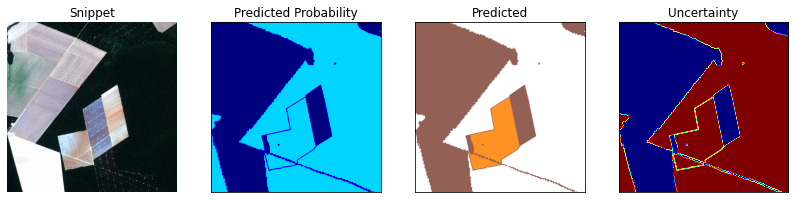

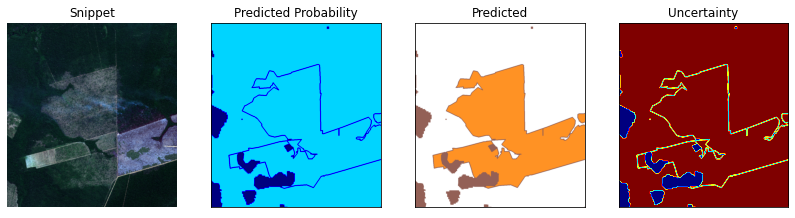

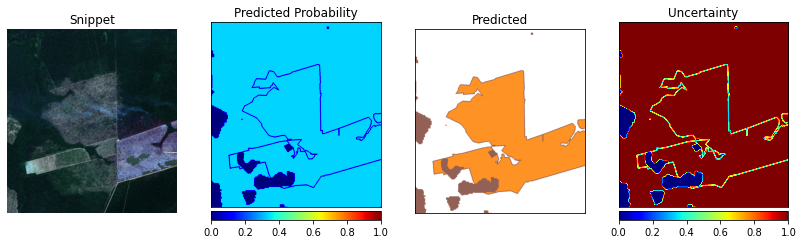

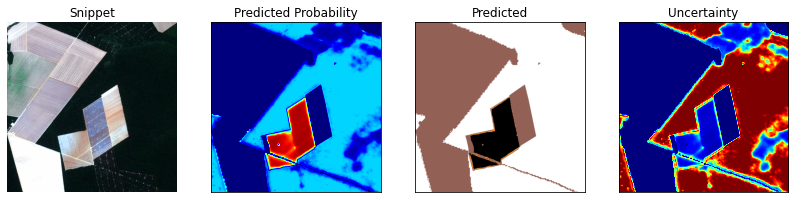

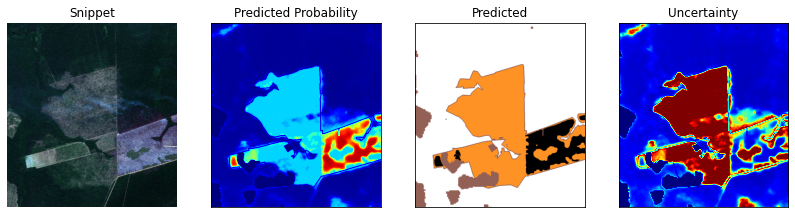

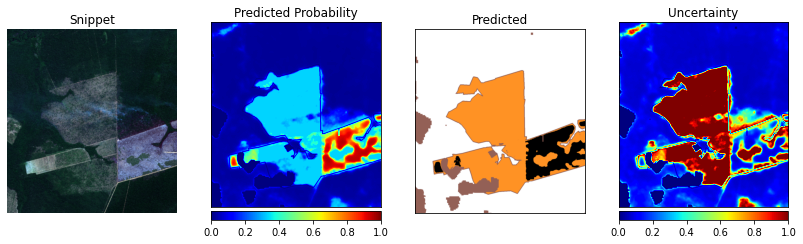

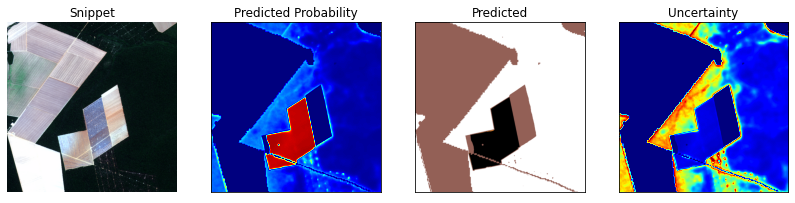

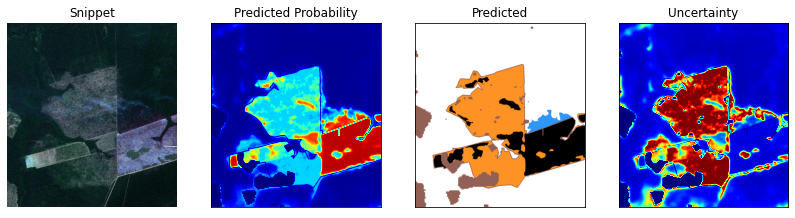

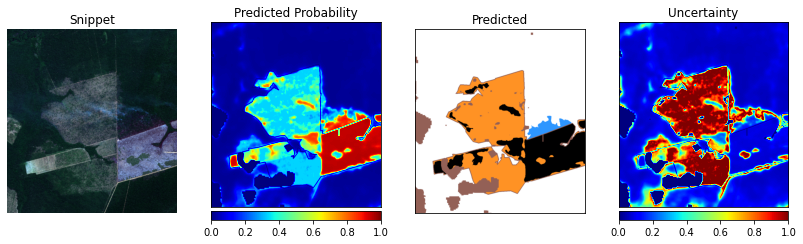

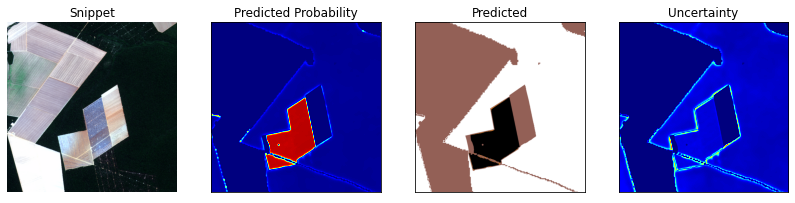

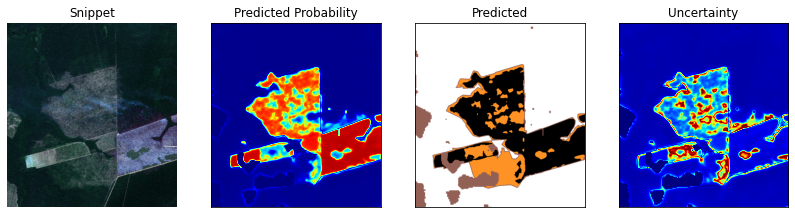

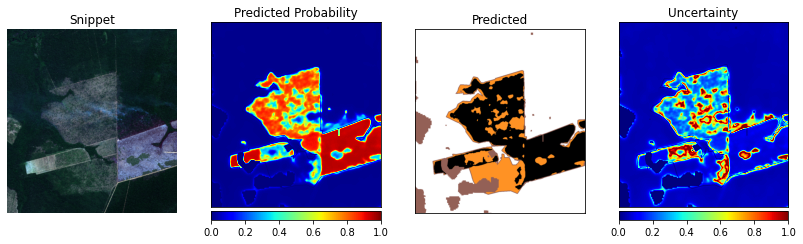

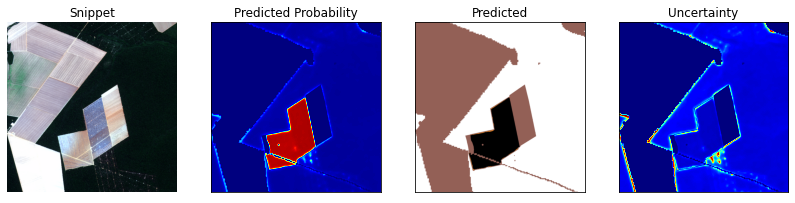

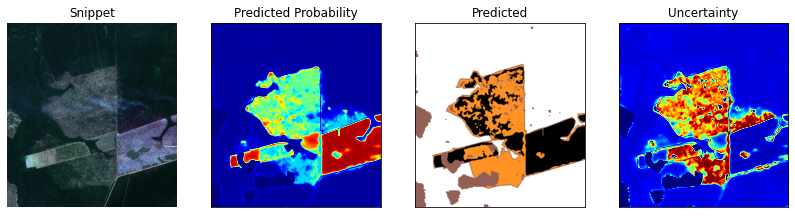

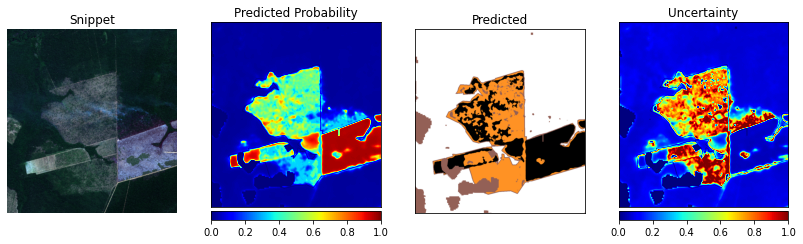

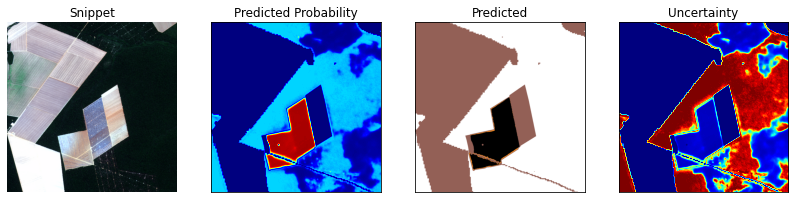

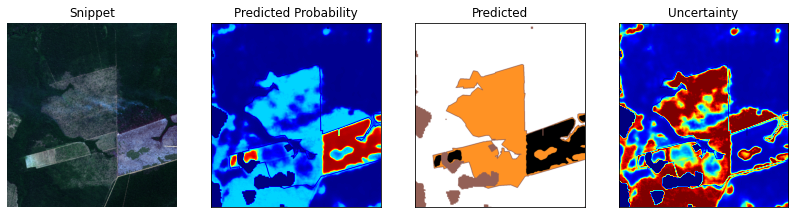

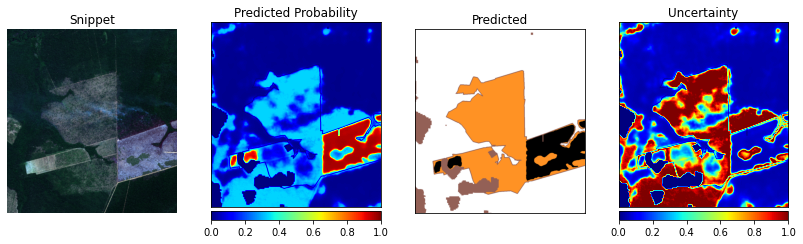

In [9]:
if inferring == True:
    idx = 0
    while idx < len(exp_ids):
    # for experiment_value, exp_id in zip(experiment_values, exp_ids):
        try:
            config = {
            "training": False,
            "learning_rate": 1e-4,
            "weights": [0.1, 0.9, 0],
            "save_probabilities": False,
            "loadInference": False,
            "addPastDeforestationInput": True,
            "inference_times": 1,
            "Uncertainty": {
                "annealing_step": 10*375 # 1875
            },
            "uncertainty_method": uncertaintyMethod,
            "evidence_function": evidential.relu_evidence
            }
            print("Beginning run number {}".format(idx))
            trainer = TrainerEvidential(config, dataset, patchesHandler)

            trainer.defineExperiment(exp_ids[idx])

            trainer.setExperimentPath()
            trainer.createLogFolders()

            trainer.loadDataset()

            # %%
            result = trainer.run_predictor()
            print("Result idx {}: {}".format(idx, result))
            results.append(result)


            with open('log.pkl', 'wb') as f:
                pickle.dump(results, f)
            print("Grid execution idx: {}".format(idx))
            idx += 1
        except Exception as e: 
            print(e)
            print("Execution error in idx {}. Retrying...".format(idx))
            idx += 1
            # continue

In [10]:
print(results)

[{'other_uncertainty_metrics': {'sUEO': 0.020250465142625233, 'ece_score': 0.3783536949579121}, 'uncertainty_result': {'metrics': {'precision_L': array([0.93296394]), 'recall_L': array([0.5868701]), 'recall_Ltotal': array([0.38932798]), 'AA': array([0.40863756]), 'precision_H': array([nan]), 'recall_H': array([0.]), 'UEO': array([0.01568928]), 'f1_L': array([0.72051109]), 'f1_H': array([nan]), 'f1': 54.94}, 'metrics_audited': {'precision': array([0.96289413]), 'recall': array([0.72593078]), 'f1': array([0.82778799])}, 'exp': 211}}, {'other_uncertainty_metrics': {'sUEO': 0.14865209095167847, 'ece_score': 0.2298546076324019}, 'uncertainty_result': {'metrics': {'precision_L': array([0.7778683]), 'recall_L': array([0.77990398]), 'recall_Ltotal': array([0.61288662]), 'AA': array([0.02999751]), 'precision_H': array([nan]), 'recall_H': array([0.]), 'UEO': array([0.11145317]), 'f1_L': array([0.77888481]), 'f1_H': array([nan]), 'f1': 68.56}, 'metrics_audited': {'precision': array([0.82534044]),

In [11]:
print(len(results))

5


In [12]:
results[9]

IndexError: list index out of range

In [ ]:
trainer.f1

63.79

In [ ]:
print(trainer.f1)

63.79
